# Import helper functions

In [16]:
import dataframe_image as dfi

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', '{:,.3f}'.format)


def data_description(df):
    print("Variables:\n\n{}".format(df.dtypes), end="\n\n")
    print("Number of rows {}".format(df.shape[0]), end="\n\n")
    print("Number of columns {}".format(df.shape[1]), end="\n\n")
    print("NA analysis".format())
    for i in df.columns:
        print("column {}: {} {}".format(i, df[i].isna().any(), df[i].isna().sum()))


def unique_values_columns(df):
    """
    Display unique values for each object (or string) column in a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame

    Returns:
    - dict: A dictionary with column names as keys and unique values as lists.
    """

    # Filter out only object or string type columns
    object_cols = df.select_dtypes(include=["object"]).columns

    # Get unique values for each object column
    unique_values = {col: df[col].unique().tolist() for col in object_cols}

    return unique_values


def reduce_mem_usage(df, verbose=True):
    numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(
            "Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

# Loading Data

In [5]:
# df = pd.read_csv('../data/df_raw.csv')
# df.to_parquet('../data/df_raw.parquet')

df = pd.read_parquet("../data/df_raw.parquet")

df = reduce_mem_usage(df)

Mem. usage decreased to  4.08 Mb (27.7% reduction)


# Data Description

In [4]:
df.head(5)

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.000,65.000,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.002,3.881
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.000,69.000,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.002,3.881
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.000,66.000,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.761,3.881
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,75.000,75.000,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.523,3.881
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,70.000,70.000,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253,3.881


In [10]:
data_description(df)

Variables:

Unnamed: 0           int16
Date_imp            object
Date_imp_d          object
Cluster               int8
Category_name       object
name                object
price              float16
disc_price         float16
merchant            object
condition           object
Disc_percentage    float16
isSale              object
Imp_count             int8
brand               object
p_description       object
currency            object
dateAdded           object
dateSeen            object
dateUpdated         object
imageURLs           object
manufacturer        object
shipping            object
sourceURLs          object
weight              object
Date_imp_d.1        object
Day_n               object
month                 int8
month_n             object
day                   int8
Week_Number           int8
Zscore_1           float16
price_std          float16
dtype: object

Number of rows 23151

Number of columns 32

NA analysis
column Unnamed: 0: False 0
column Date_imp: False 0
c

# Descriptive Statistics

In [6]:
df = df[
    [
        "Date_imp_d",
        "Category_name",
        "name",
        "price",
        "disc_price",
        "merchant",
        "Disc_percentage",
        "brand",
        "manufacturer",
        "Day_n",
        "month",
        "month_n",
        "day",
        "Week_Number",
    ]
]

new_columns_name = [i.lower() for i in df.columns]

df.columns = new_columns_name

In [8]:
df1 = df.copy()
df1.describe().T

/home/dbcordeiro@sefaz.al.gov.br/.conda/envs/price_elasticity_prediction_dev/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/dbcordeiro@sefaz.al.gov.br/.conda/envs/price_elasticity_prediction_dev/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/home/dbcordeiro@sefaz.al.gov.br/.conda/envs/price_elasticity_prediction_dev/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/dbcordeiro@sefaz.al.gov.br/.conda/envs/price_elasticity_prediction_dev/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
price,"23,151.000",inf,inf,1.000,83.000,200.000,540.000,"10,880.000"
disc_price,"23,151.000",inf,inf,1.000,80.000,199.000,516.500,"10,880.000"
disc_percentage,"23,151.000",0.017,0.078,0.000,0.000,0.000,0.000,0.800
month,"23,151.000",7.651,2.593,1.000,6.000,8.000,9.000,12.000
day,"23,151.000",15.694,9.682,1.000,7.000,16.000,24.000,31.000
week_number,"23,151.000",31.343,11.316,1.000,23.000,32.000,38.000,51.000


# EDA

1) Which merchant has sold the most?

2) Which category has sold the most?

3) Which brand has sold the most?

4) Which day has more sellings?

5) Which month has more sellings?

## Which merchant has sold the most?

,merchant,date_imp_d
1,Bestbuy.com,11287
4,bhphotovideo.com,5064
2,Walmart.com,3947
5,ebay.com,2809
0,Amazon.com,25
6,kmart.com,17
3,barcodable.com,2


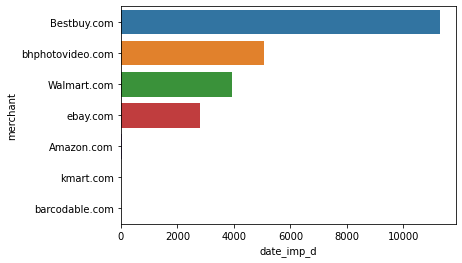

In [6]:
aux1 = (
    df1[["date_imp_d", "merchant"]]
    .groupby("merchant")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
)

sns.barplot(y="merchant", x="date_imp_d", data=aux1)
aux1

## Which category has sold the most?

,category_name,date_imp_d
57,"tv, television, video",2130
27,"laptop, computer",1715
50,"speaker, portable, bluetooth",1104
5,"camera, mirrorless, photo",1072
9,"car, speaker, subwoofer",865
41,"receiver, amplifier, home",817
6,"camera, shoot",744
15,"drive, storage, hard",719
16,"drive, storage, internal",718
8,"car, receiver, dash",712


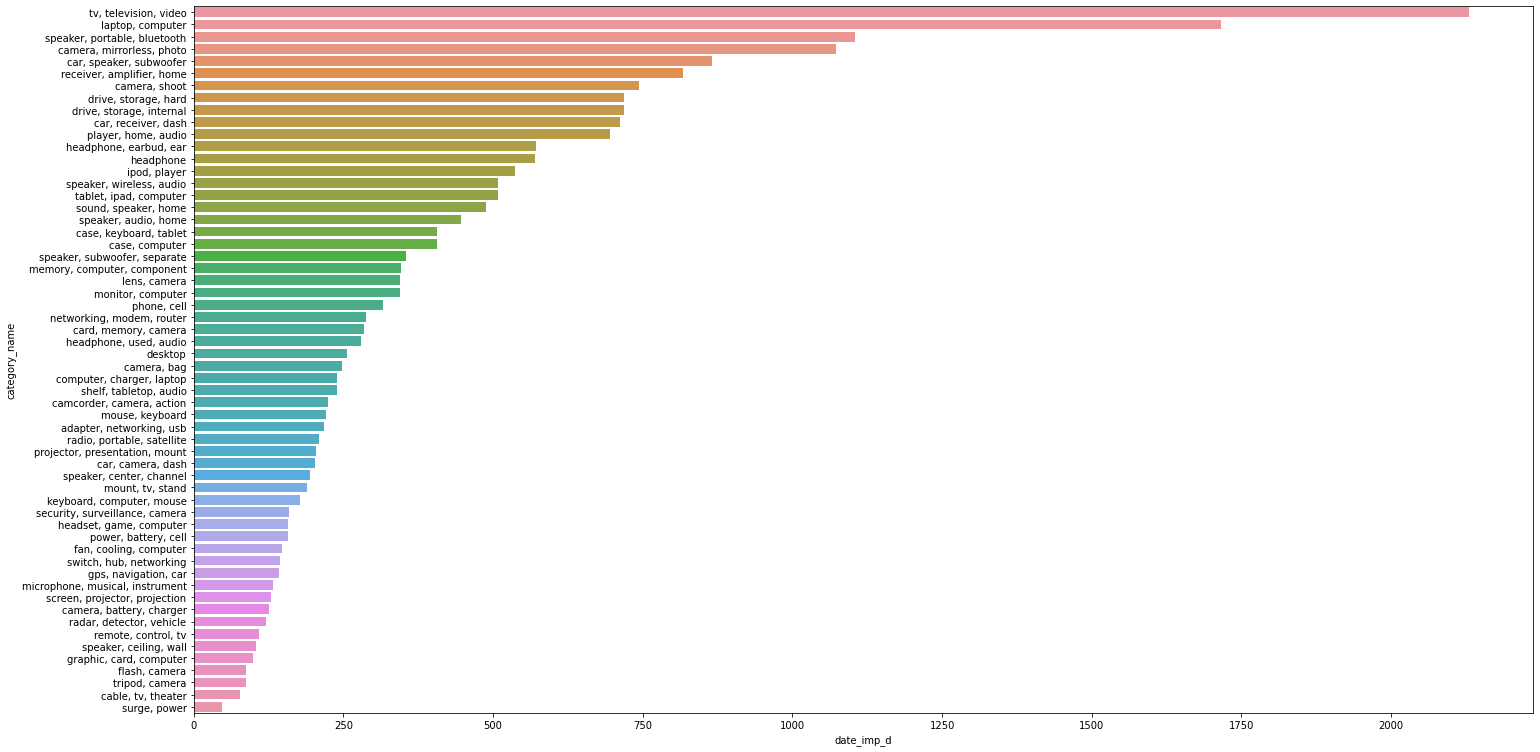

In [7]:
plt.figure(figsize=(24, 13))
aux1 = (
    df1[["date_imp_d", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
)
sns.barplot(y="category_name", x="date_imp_d", data=aux1)
aux1

### Which category has more sellings by merchant

In [7]:
df_bestbuy = df1[df1["merchant"] == "Bestbuy.com"]
df_walmart = df1[df1["merchant"] == "Walmart.com"]
df_ebay = df1[df1["merchant"] == "ebay.com"]
df_bh = df1[df1["merchant"] == "bhphotovideo.com"]

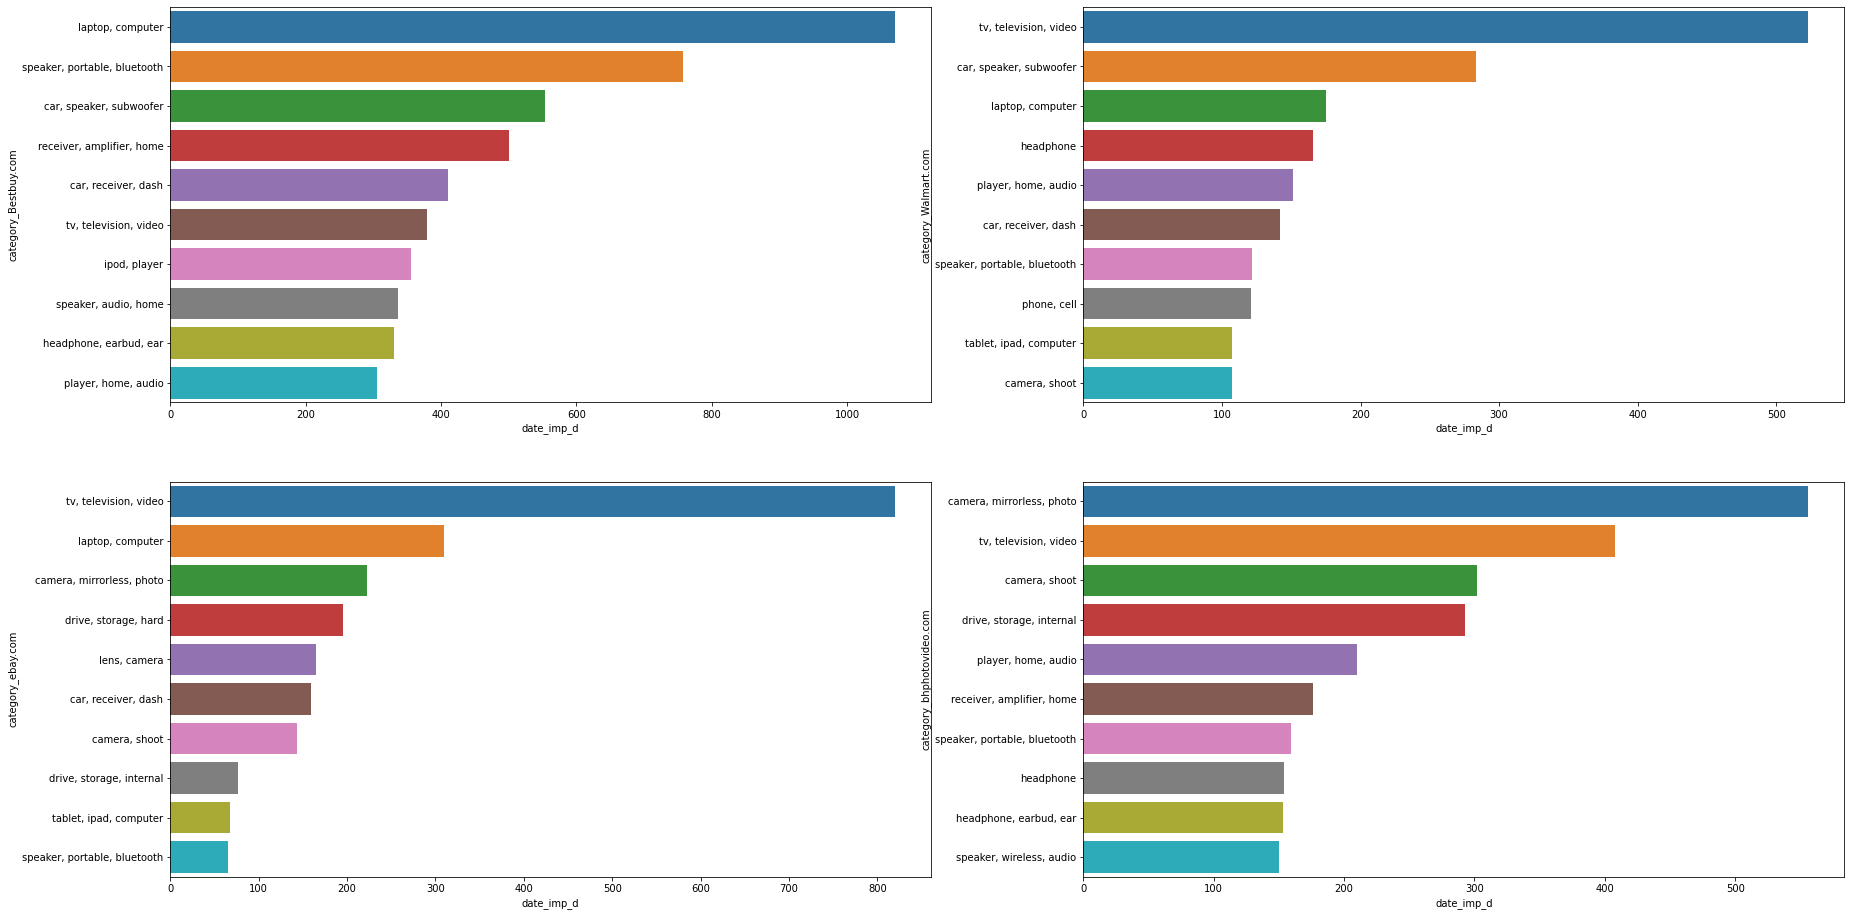

In [6]:
plt.figure(figsize=(30, 16))


aux1_bestbuy = (
    df_bestbuy[["date_imp_d", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"category_name": "category_Bestbuy.com"})
)

aux1_walmart = (
    df_walmart[["date_imp_d", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"category_name": "category_Walmart.com"})
)
aux1_ebay = (
    df_ebay[["date_imp_d", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"category_name": "category_ebay.com"})
)

aux1_bh = (
    df_bh[["date_imp_d", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"category_name": "category_bhphotovideo.com"})
)

plt.subplot(2, 2, 1)
sns.barplot(x="date_imp_d", y="category_Bestbuy.com", data=aux1_bestbuy.head(10))
plt.subplot(2, 2, 2)
sns.barplot(x="date_imp_d", y="category_Walmart.com", data=aux1_walmart.head(10))
plt.subplot(2, 2, 3)
sns.barplot(x="date_imp_d", y="category_ebay.com", data=aux1_ebay.head(10))
plt.subplot(2, 2, 4)
sns.barplot(x="date_imp_d", y="category_bhphotovideo.com", data=aux1_bh.head(10))

## Which brand has sold the most?

,brand,date_imp_d
213,Sony,3205
189,Samsung,1924
12,Apple,1771
254,Yamaha,721
166,Pioneer,559
37,Canon,528
109,Kenwood,458
146,Nikon,449
97,JBL,385
190,SanDisk,361


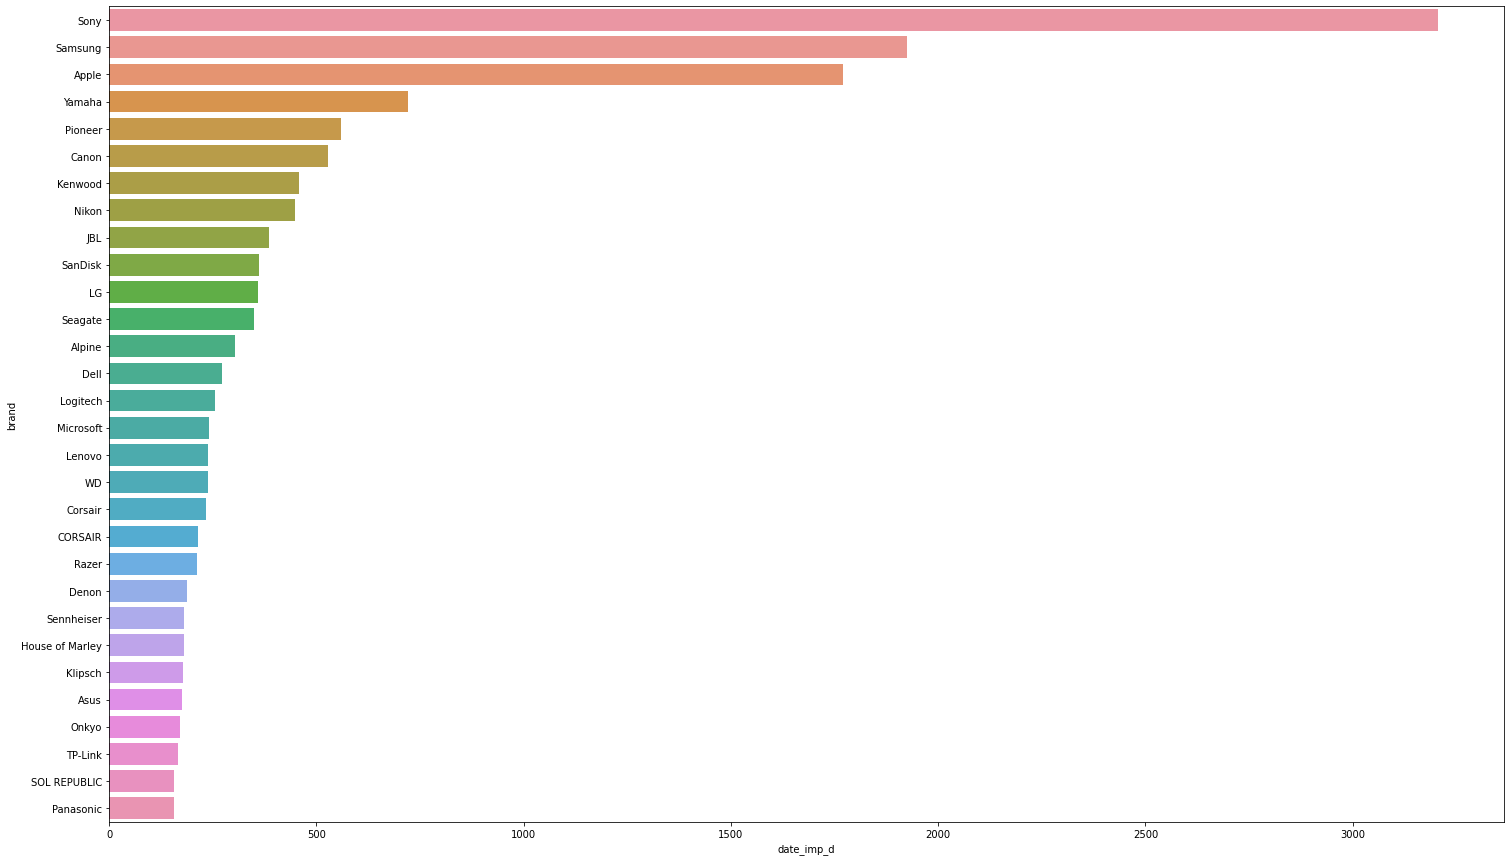

In [63]:
# Select the 30 brands that have sold the most
plt.figure(figsize=(25, 15))
aux1 = (
    df1[["date_imp_d", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .head(30)
)

sns.barplot(y="brand", x="date_imp_d", data=aux1.head(30))
aux1

### Which brand has sold the most by brand

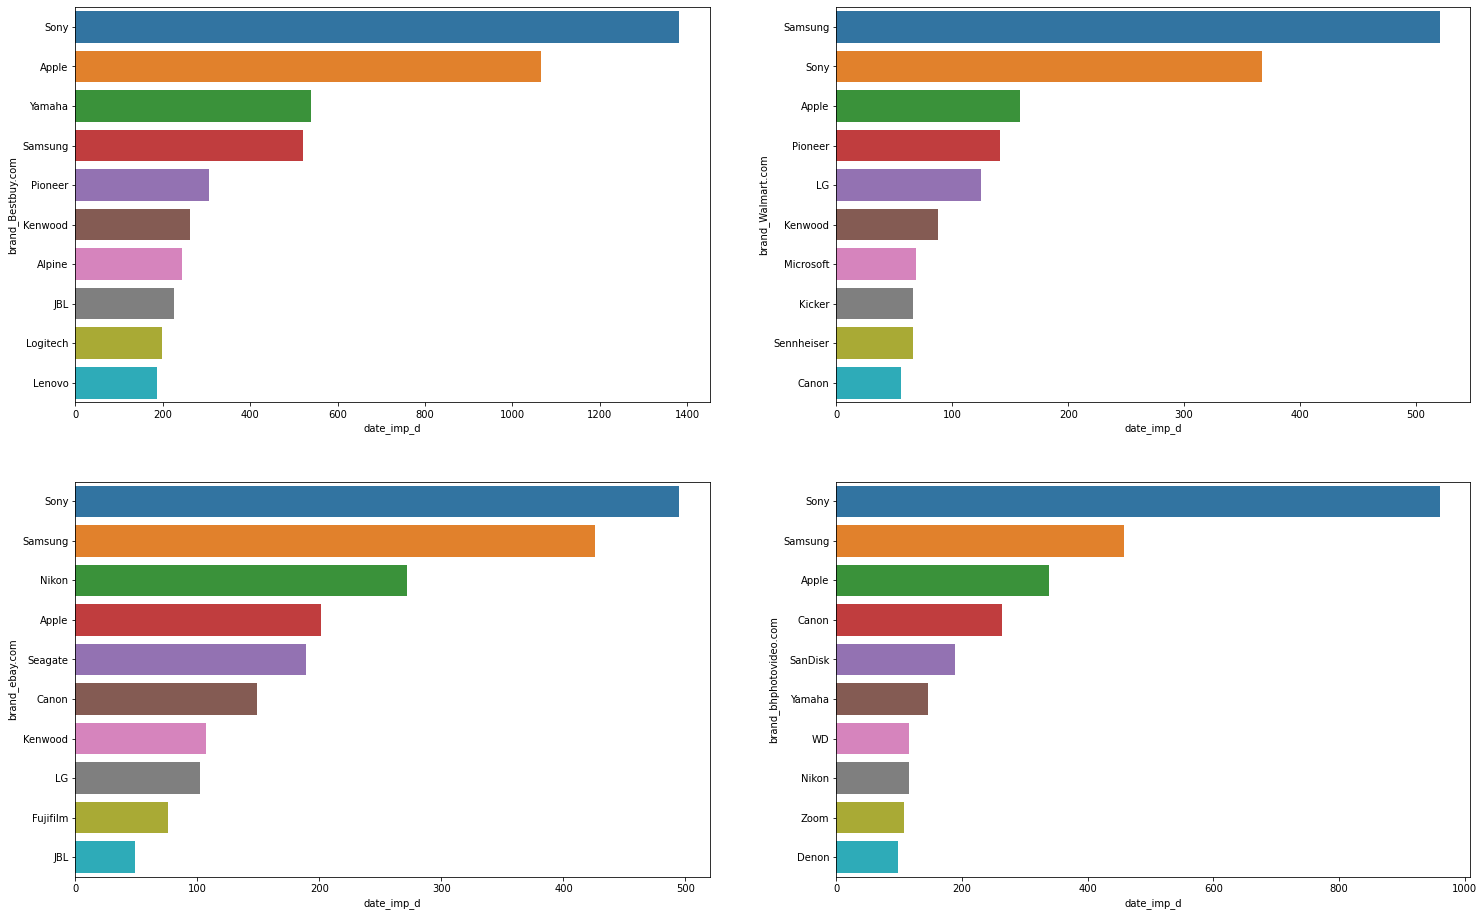

In [95]:
plt.figure(figsize=(25, 16))
aux1_bestbuy = (
    df_bestbuy[["date_imp_d", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"brand": "brand_Bestbuy.com"})
)

aux1_walmart = (
    df_walmart[["date_imp_d", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"brand": "brand_Walmart.com"})
)
aux1_ebay = (
    df_ebay[["date_imp_d", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"brand": "brand_ebay.com"})
)

aux1_bh = (
    df_bh[["date_imp_d", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
    .rename(columns={"brand": "brand_bhphotovideo.com"})
)

plt.subplot(2, 2, 1)
sns.barplot(x="date_imp_d", y="brand_Bestbuy.com", data=aux1_bestbuy.head(10))
plt.subplot(2, 2, 2)
sns.barplot(x="date_imp_d", y="brand_Walmart.com", data=aux1_walmart.head(10))
plt.subplot(2, 2, 3)
sns.barplot(x="date_imp_d", y="brand_ebay.com", data=aux1_ebay.head(10))
plt.subplot(2, 2, 4)
sns.barplot(x="date_imp_d", y="brand_bhphotovideo.com", data=aux1_bh.head(10))

## Which day has more sellings?

,day_n,date_imp_d
5,Tuesday,5573
6,Wednesday,3949
4,Thursday,3574
2,Saturday,3112
1,Monday,2995
0,Friday,2407
3,Sunday,1541


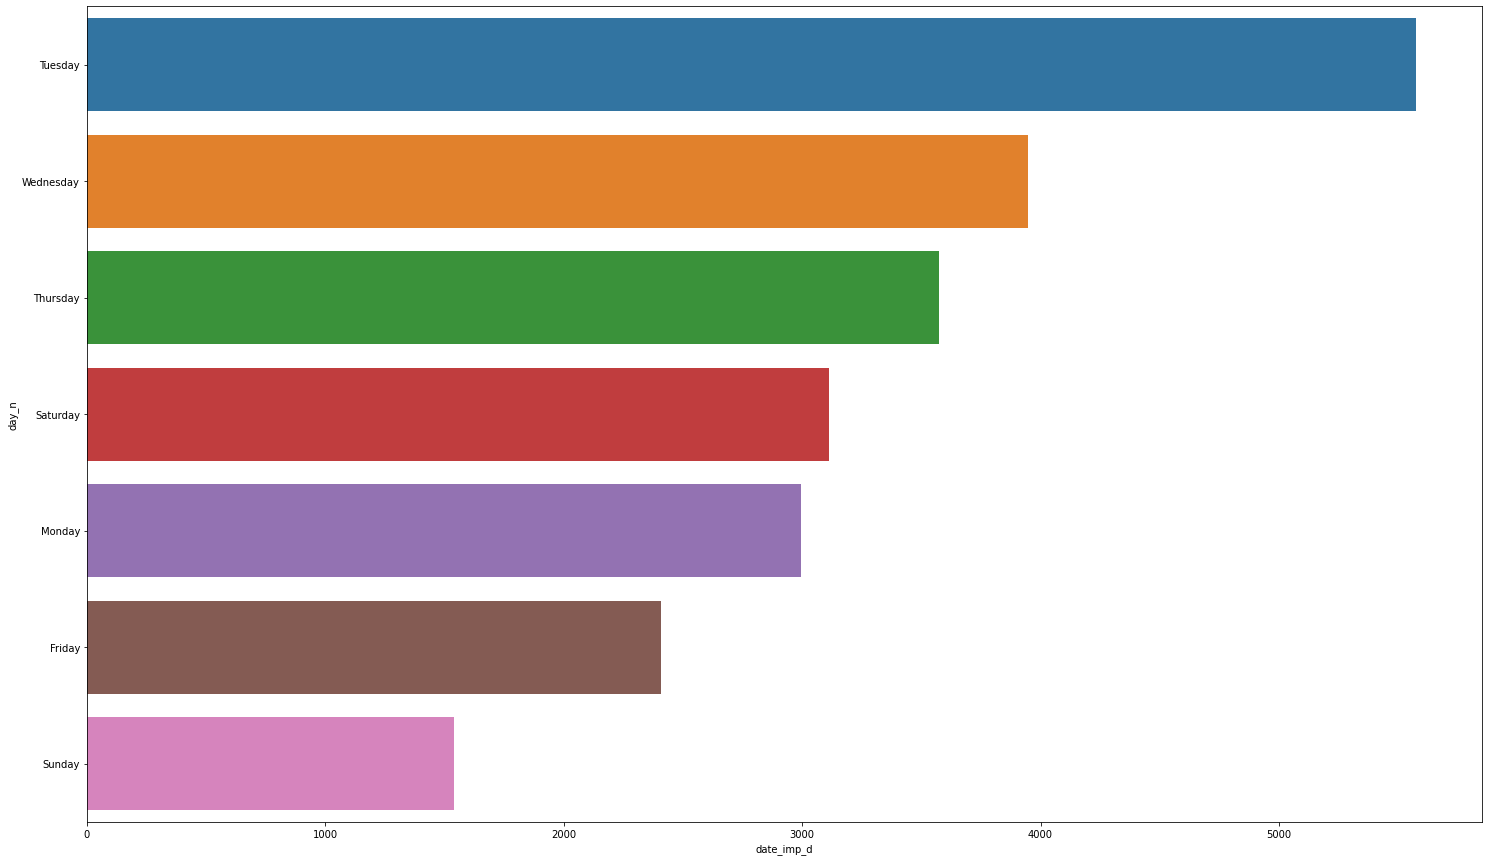

In [79]:
plt.figure(figsize=(25, 15))
aux1 = (
    df1[["date_imp_d", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
)

sns.barplot(y="day_n", x="date_imp_d", data=aux1)
aux1

## Which month has more sellings?

,month_n,date_imp_d
1,August,5004
4,July,4116
6,March,2517
2,December,2474
7,May,2127
10,September,1977
9,October,1859
5,June,1448
8,November,1264
0,April,357


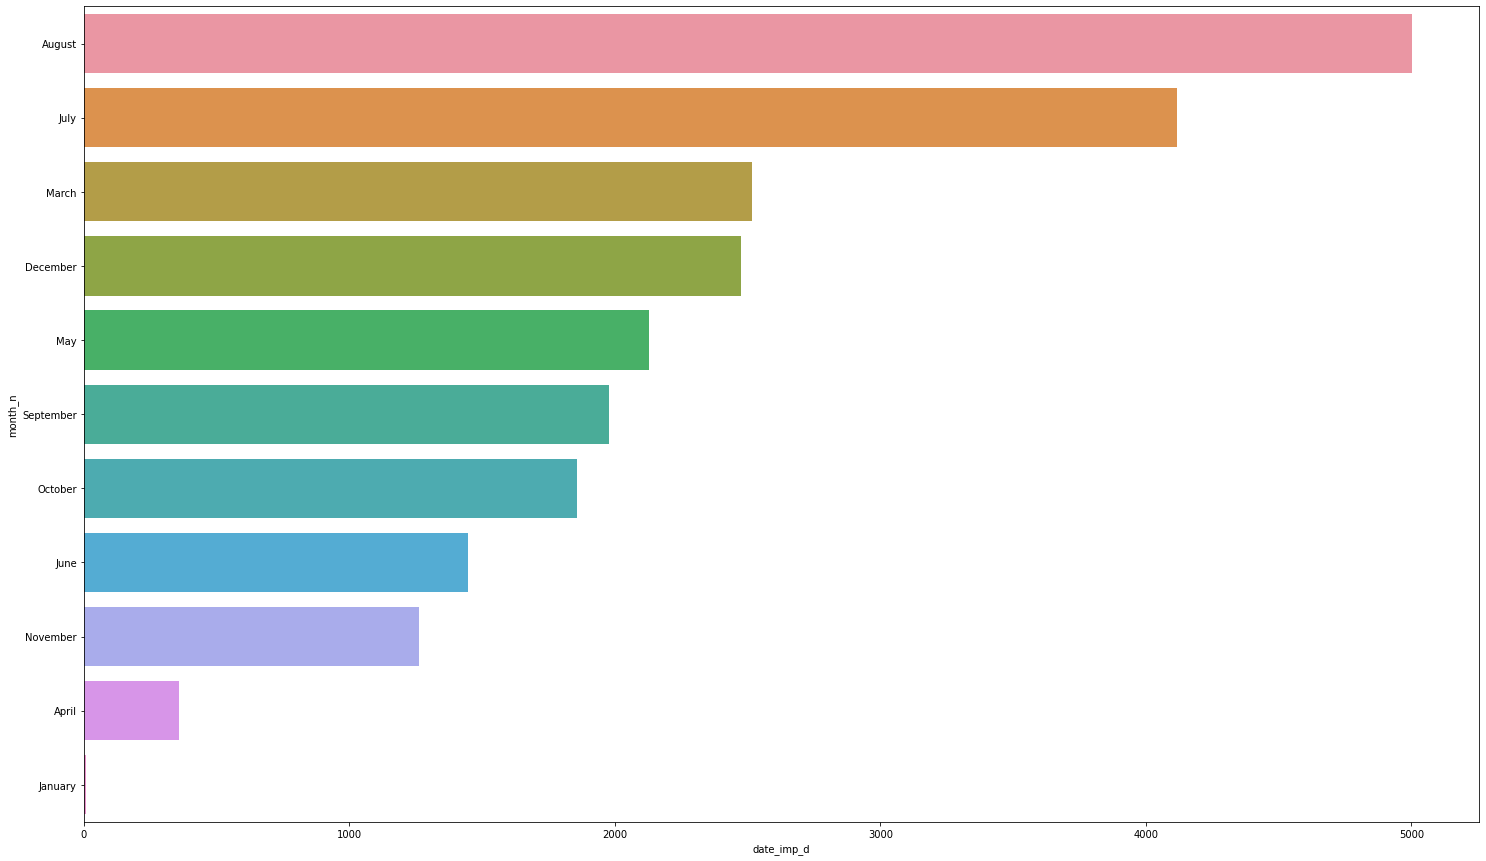

In [80]:
plt.figure(figsize=(25, 15))
aux1 = (
    df1[["date_imp_d", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
)

sns.barplot(y="month_n", x="date_imp_d", data=aux1)
aux1

## Which week has more sellings?

,week_number,date_imp_d
38,49,2330
26,35,1680
21,30,1539
22,31,1356
12,22,1140
19,29,1102
25,34,1088
41,9,893
24,33,811
29,38,799


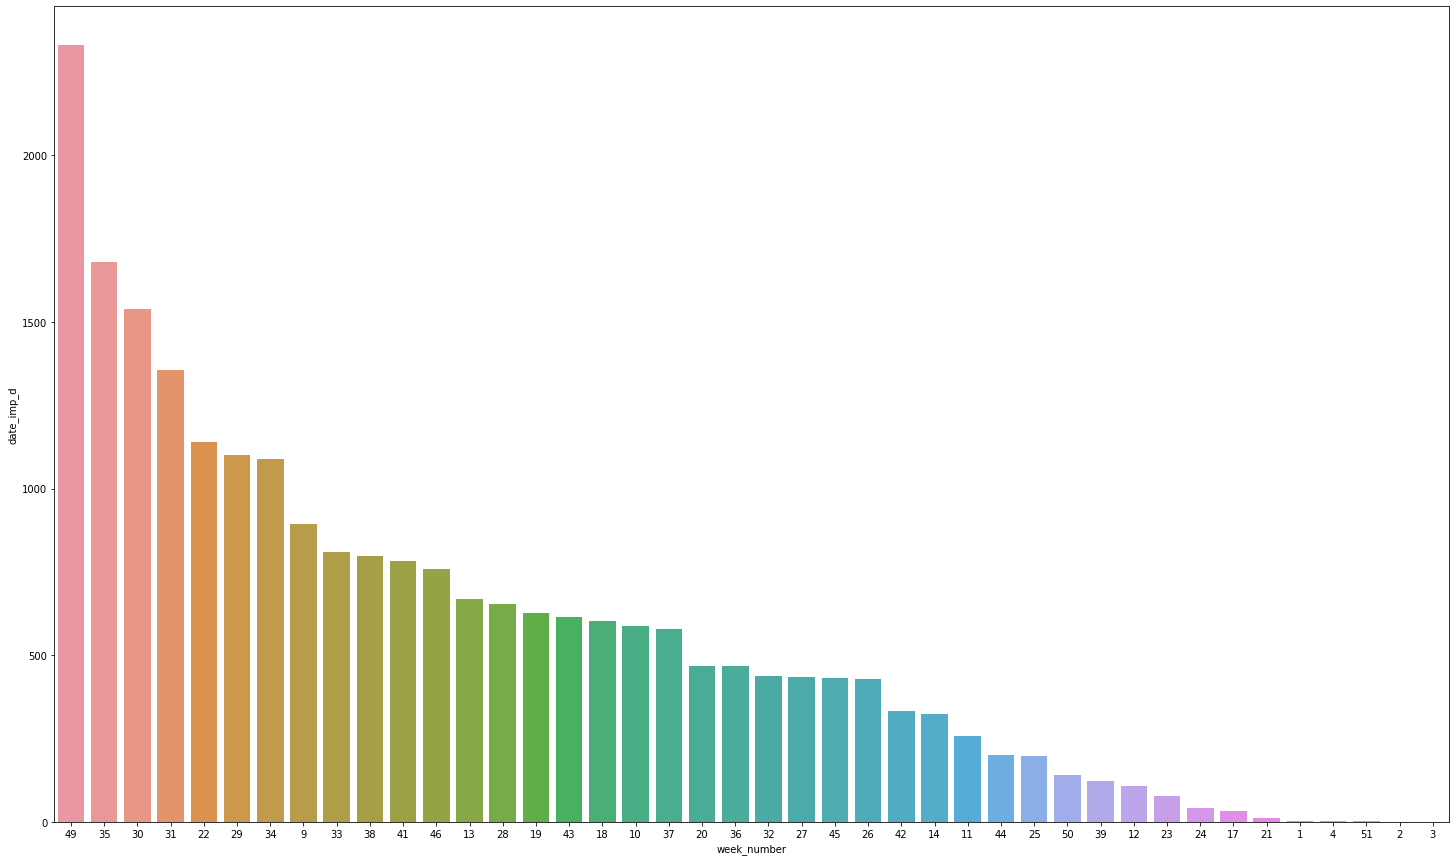

In [85]:
plt.figure(figsize=(25, 15))
df1["week_number"] = df1["week_number"].astype(str)
aux1 = (
    df1[["date_imp_d", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp_d", ascending=False)
)

sns.barplot(x="week_number", y="date_imp_d", data=aux1)
aux1

We are going to deal with Bestbuy sellings since it has the highest number of data. Also, we are going to work with the category which has sold the most. The column 'disc_price', which is the price with a discount, is the one to be used since it is the price applied in that purchase.


In [9]:
df_bestbuy = df1[df1["merchant"] == "Bestbuy.com"]
df_bestbuy_laptop = df_bestbuy[
    df_bestbuy["category_name"] == "laptop, computer"
].reset_index()

df_bestbuy_laptop_agg = (
    df_bestbuy_laptop.groupby(["name", "week_number"])
    .agg({"disc_price": "mean", "date_imp_d": "count"})
    .reset_index()
)

df_bestbuy_laptop_agg["week_number"] = df_bestbuy_laptop_agg["week_number"].astype(str)
df_bestbuy_laptop_agg["disc_price"] = df_bestbuy_laptop_agg["disc_price"].astype(float)

df_bestbuy_laptop_pivot_price = df_bestbuy_laptop_agg.pivot(
    index="week_number", columns="name", values="disc_price"
)
df_bestbuy_laptop_pivot_demand = df_bestbuy_laptop_agg.pivot(
    index="week_number", columns="name", values="date_imp_d"
)

In [10]:
# Checking NAs

df_bestbuy_laptop_pivot_price.isna().sum()
df_bestbuy_laptop_pivot_demand.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

# Replace NAs

In [11]:
median_price = np.round(df_bestbuy_laptop_pivot_price.median(), 2)

df_bestbuy_laptop_pivot_price.fillna(median_price, inplace=True)

df_bestbuy_laptop_pivot_demand.fillna(0, inplace=True)

# Descriptive statistics (products)

In [14]:
df_bestbuy_laptop_pivot_price.describe().T

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
"12 MacBook (Mid 2017, Gold)",26.0,1547.115385,26.211947,1455.0,1552.000,1552.00,1552.000,1600.0
"12 MacBook (Mid 2017, Silver)",26.0,1296.000000,14.601370,1235.0,1300.000,1300.00,1300.000,1300.0
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,26.0,413.192308,15.727732,373.0,415.500,415.50,415.500,449.0
"13.3 MacBook Air (Mid 2017, Silver)",26.0,949.307692,8.559295,912.0,950.000,950.00,950.000,970.0
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",26.0,2608.000000,115.140262,2328.0,2620.000,2620.00,2620.000,2800.0
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",26.0,2347.000000,125.044952,2024.0,2354.000,2354.00,2354.000,2600.0
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,26.0,299.730769,16.671671,237.5,305.000,305.00,305.000,313.5
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",26.0,834.038462,28.355572,765.0,830.000,830.00,830.000,900.0
Acer 15.6 Chromebook CB5-571-C4G4,26.0,242.480769,14.291592,200.0,249.000,249.00,249.000,249.0


In [15]:
df_bestbuy_laptop_pivot_demand.describe().T

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
"12 MacBook (Mid 2017, Gold)",26.0,0.961538,1.799573,0.0,0.00,0.0,2.00,8.0
"12 MacBook (Mid 2017, Silver)",26.0,0.384615,0.637302,0.0,0.00,0.0,1.00,2.0
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,26.0,1.038462,1.148243,0.0,0.00,0.5,2.00,4.0
"13.3 MacBook Air (Mid 2017, Silver)",26.0,0.384615,0.803837,0.0,0.00,0.0,0.00,2.0
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",26.0,1.153846,1.641763,0.0,0.00,0.0,2.00,6.0
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",26.0,3.230769,3.962905,0.0,0.00,1.0,5.50,12.0
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,26.0,0.538462,0.904689,0.0,0.00,0.0,1.50,2.0
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",26.0,0.384615,0.637302,0.0,0.00,0.0,1.00,2.0
Acer 15.6 Chromebook CB5-571-C4G4,26.0,0.769231,0.951113,0.0,0.00,1.0,1.00,4.0


# EDA of Bestbuy laptops

In [12]:
df_bestbuy_laptop_pivot_demand_2 = df_bestbuy_laptop_pivot_demand.copy()
df_bestbuy_laptop_pivot_price_2 = df_bestbuy_laptop_pivot_price.copy()

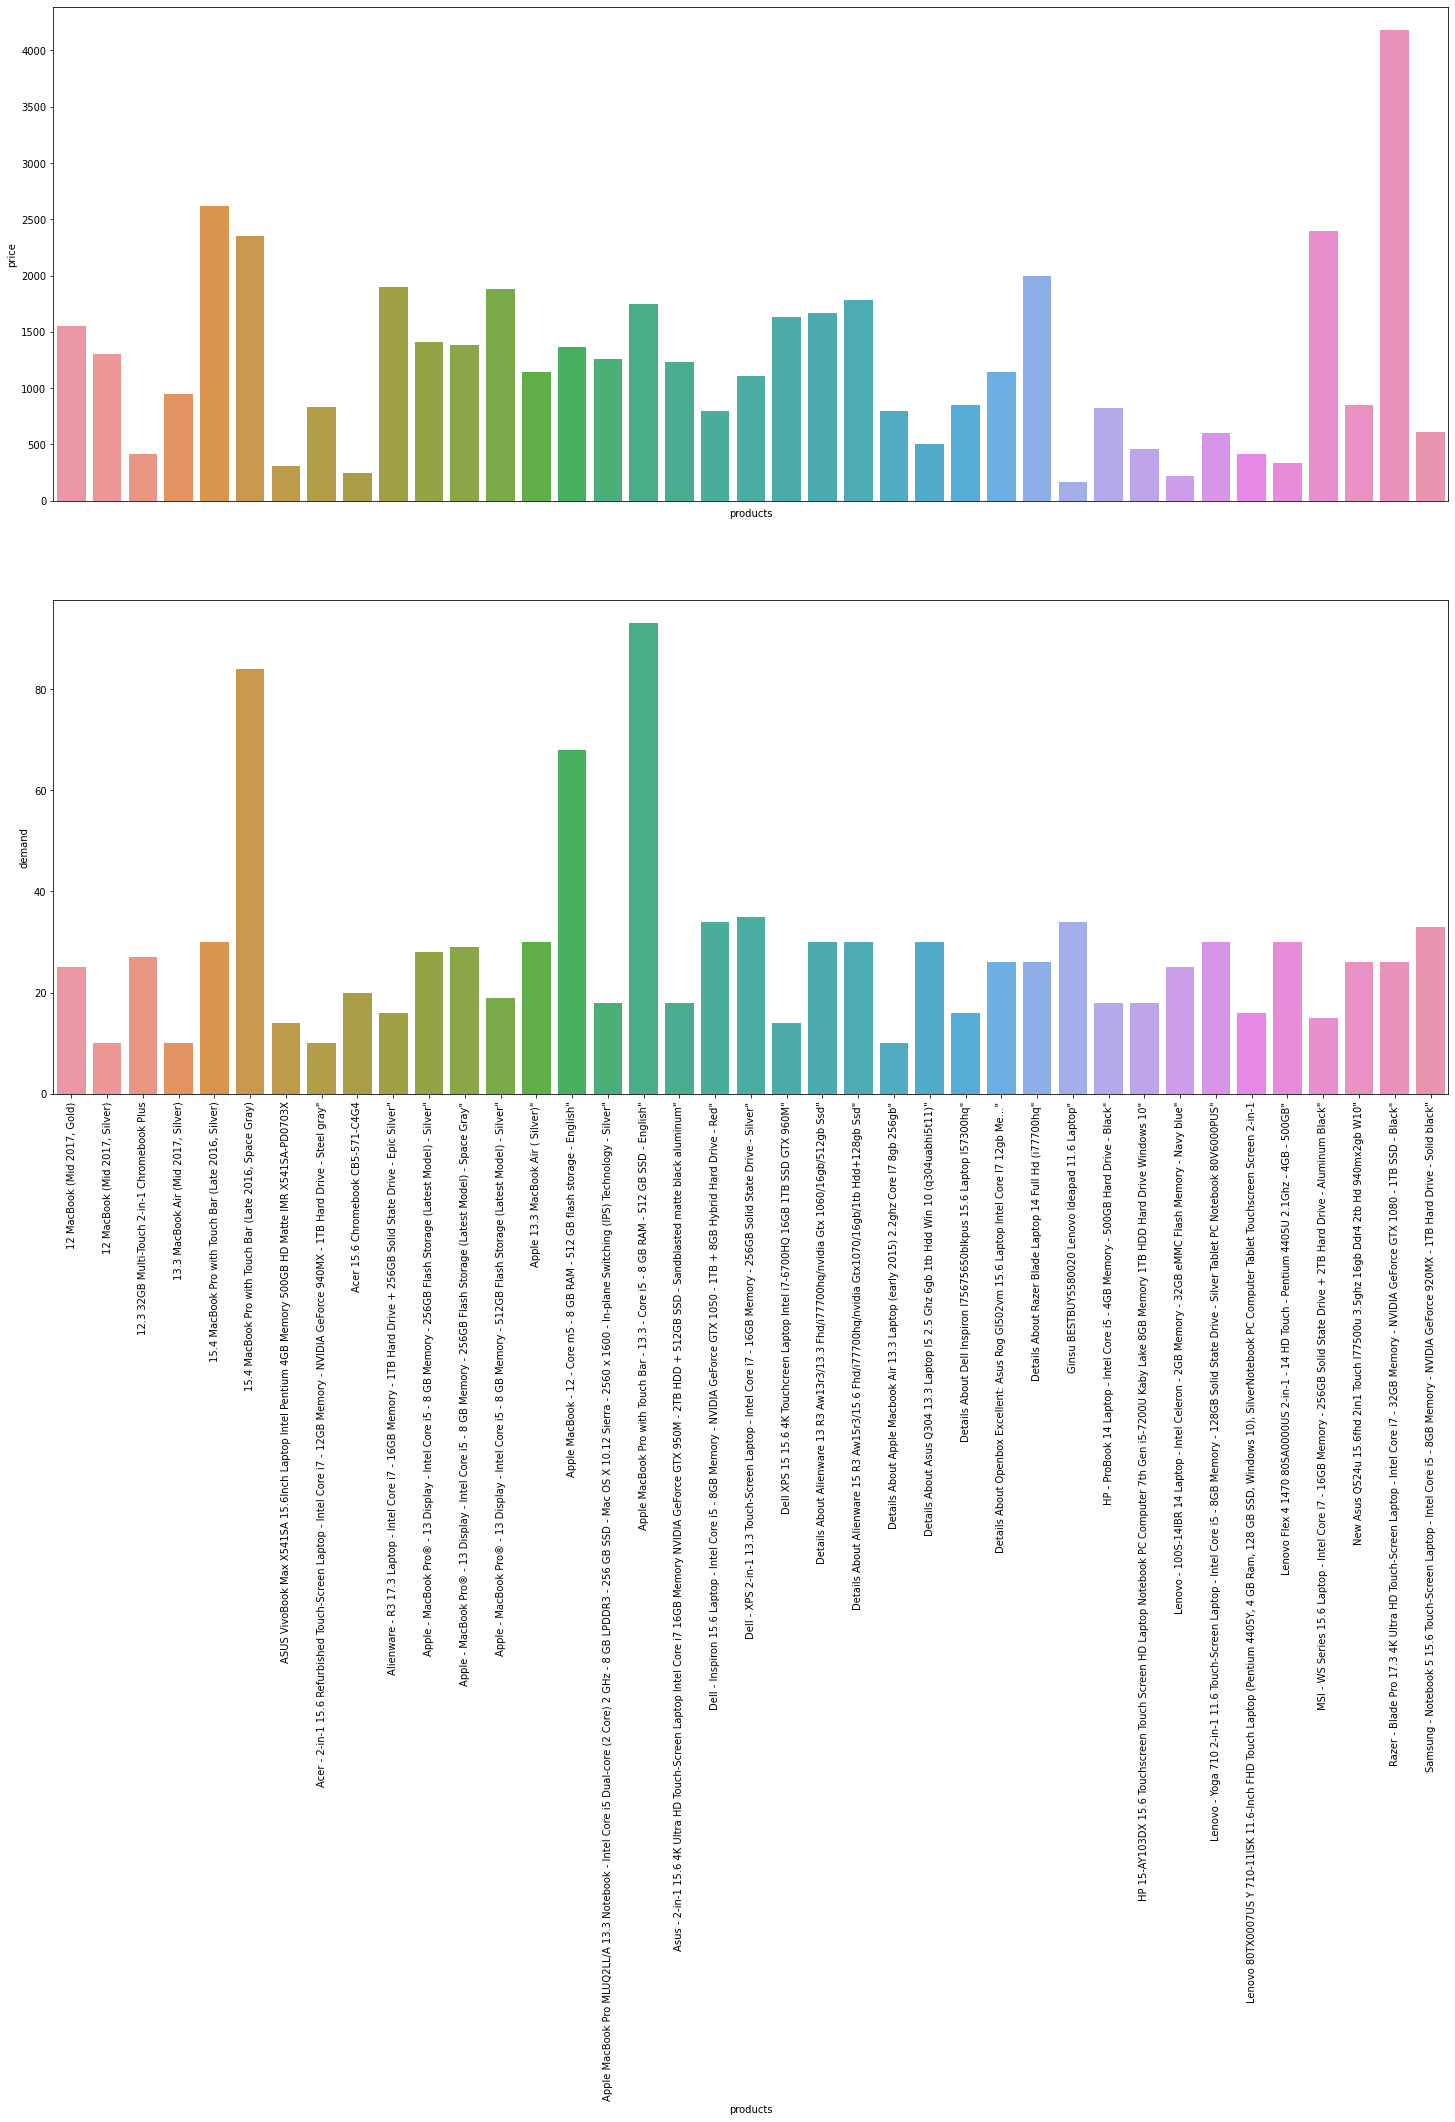

In [38]:
plt.figure(figsize=(25, 20))
aux1 = df_bestbuy_laptop_pivot_price_2.apply(lambda x: x.median()).reset_index()
aux1.columns = ["products", "price"]
plt.subplot(2, 1, 1)
sns.barplot(x="products", y="price", data=aux1)
plt.xticks([])


aux2 = df_bestbuy_laptop_pivot_demand_2.apply(lambda x: x.sum()).reset_index()
aux2.columns = ["products", "demand"]
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
sns.barplot(x="products", y="demand", data=aux2)

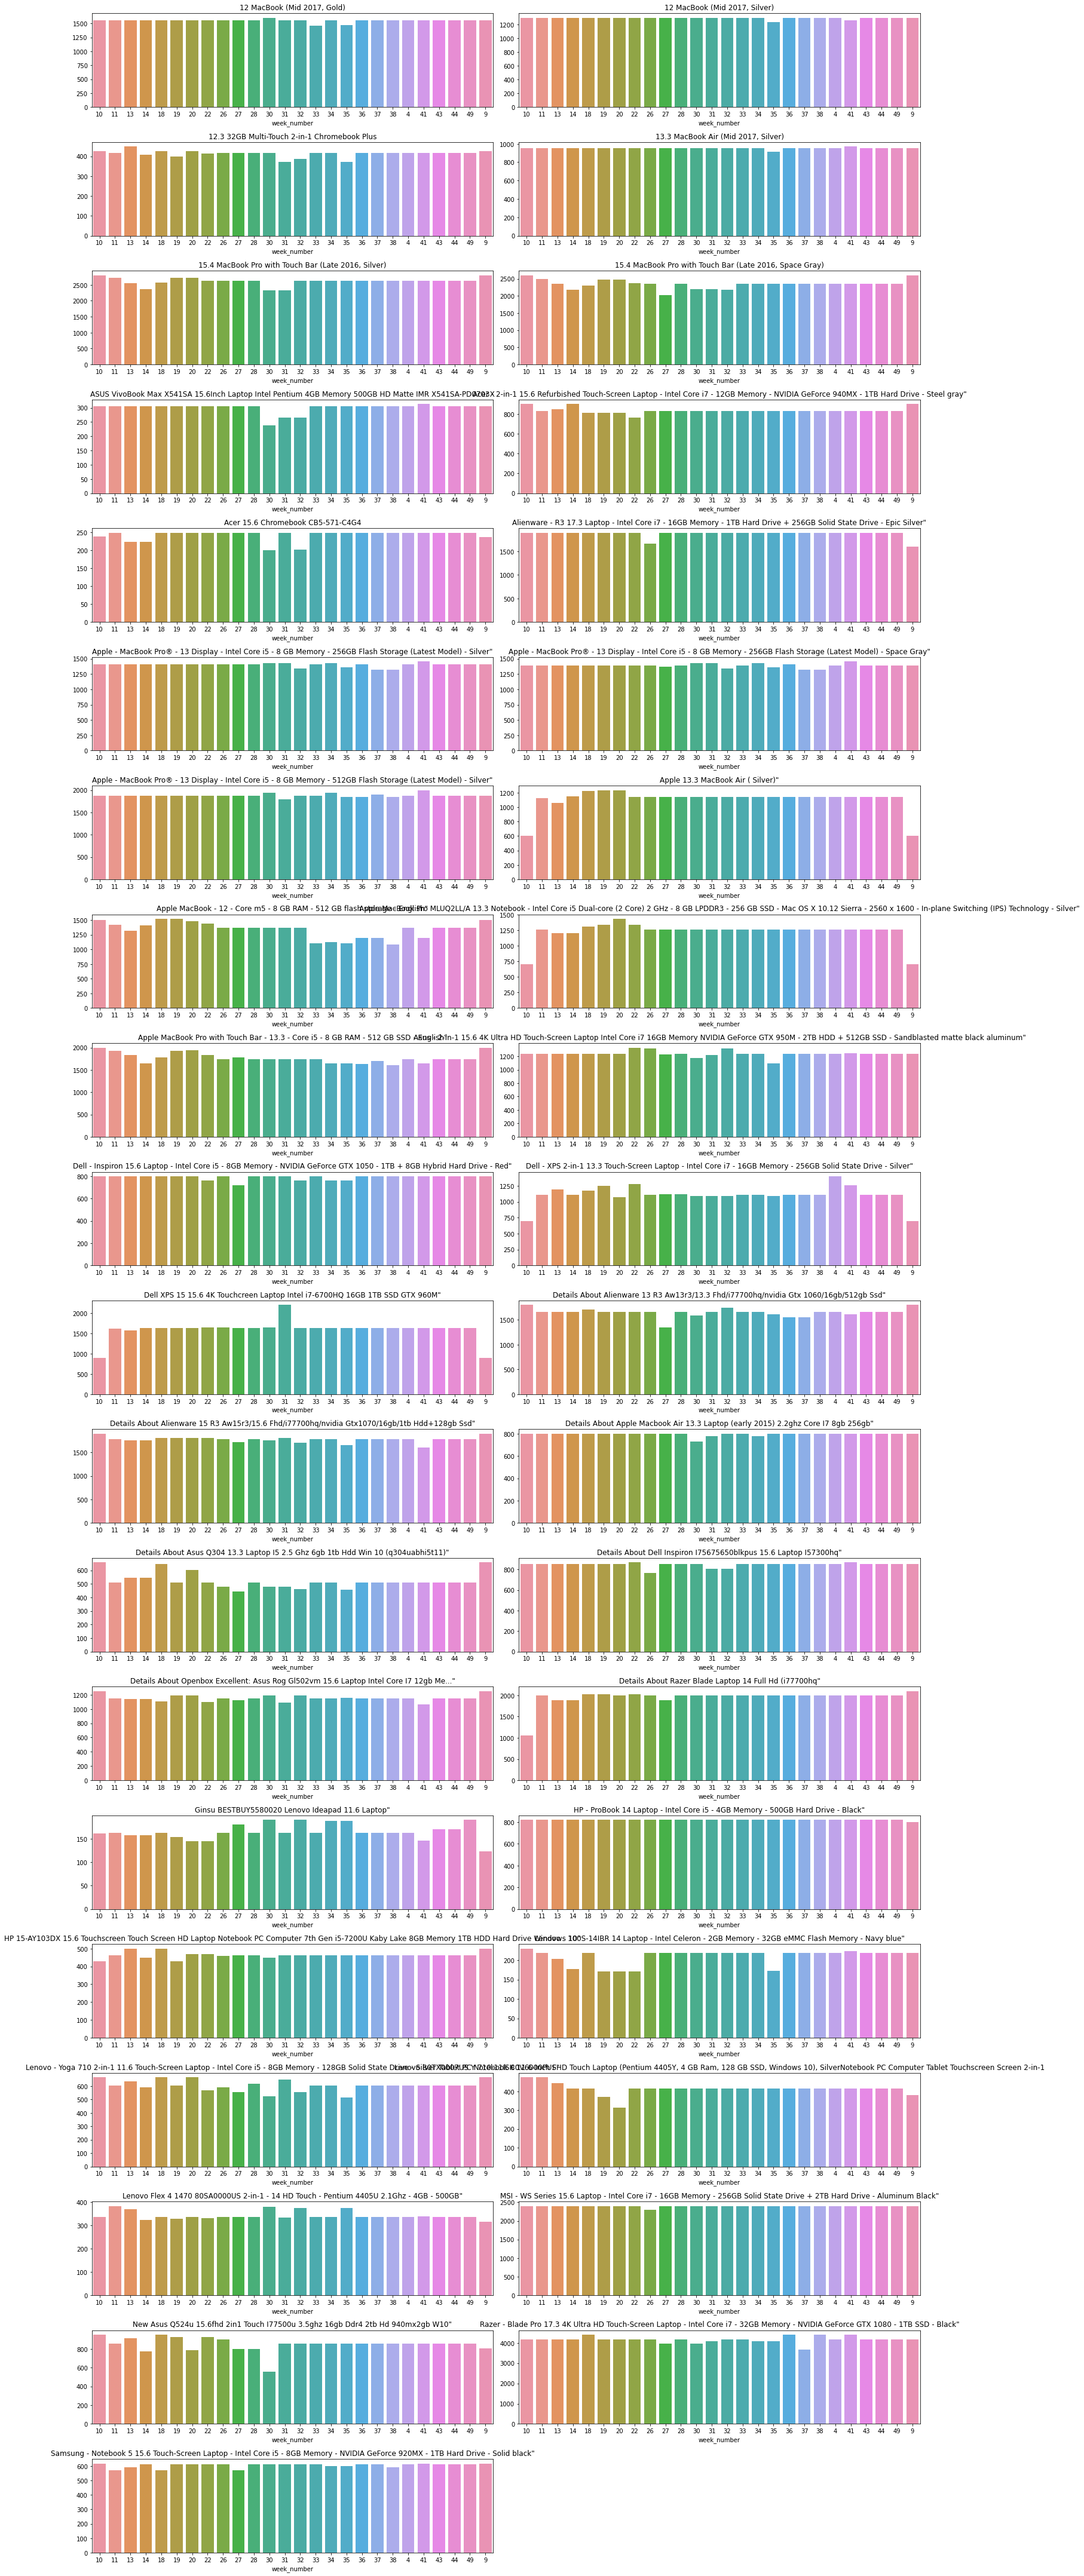

In [20]:
df_aux1 = pd.DataFrame(df_bestbuy_laptop_pivot_price_2.to_records())
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(df_aux1.columns), 1):
    plt.subplot(20, 2, k)
    sns.barplot(x="week_number", y=df_aux1.columns[k], data=df_aux1)
    plt.title(df_aux1.columns[k])
    plt.ylabel("")
    plt.tight_layout()

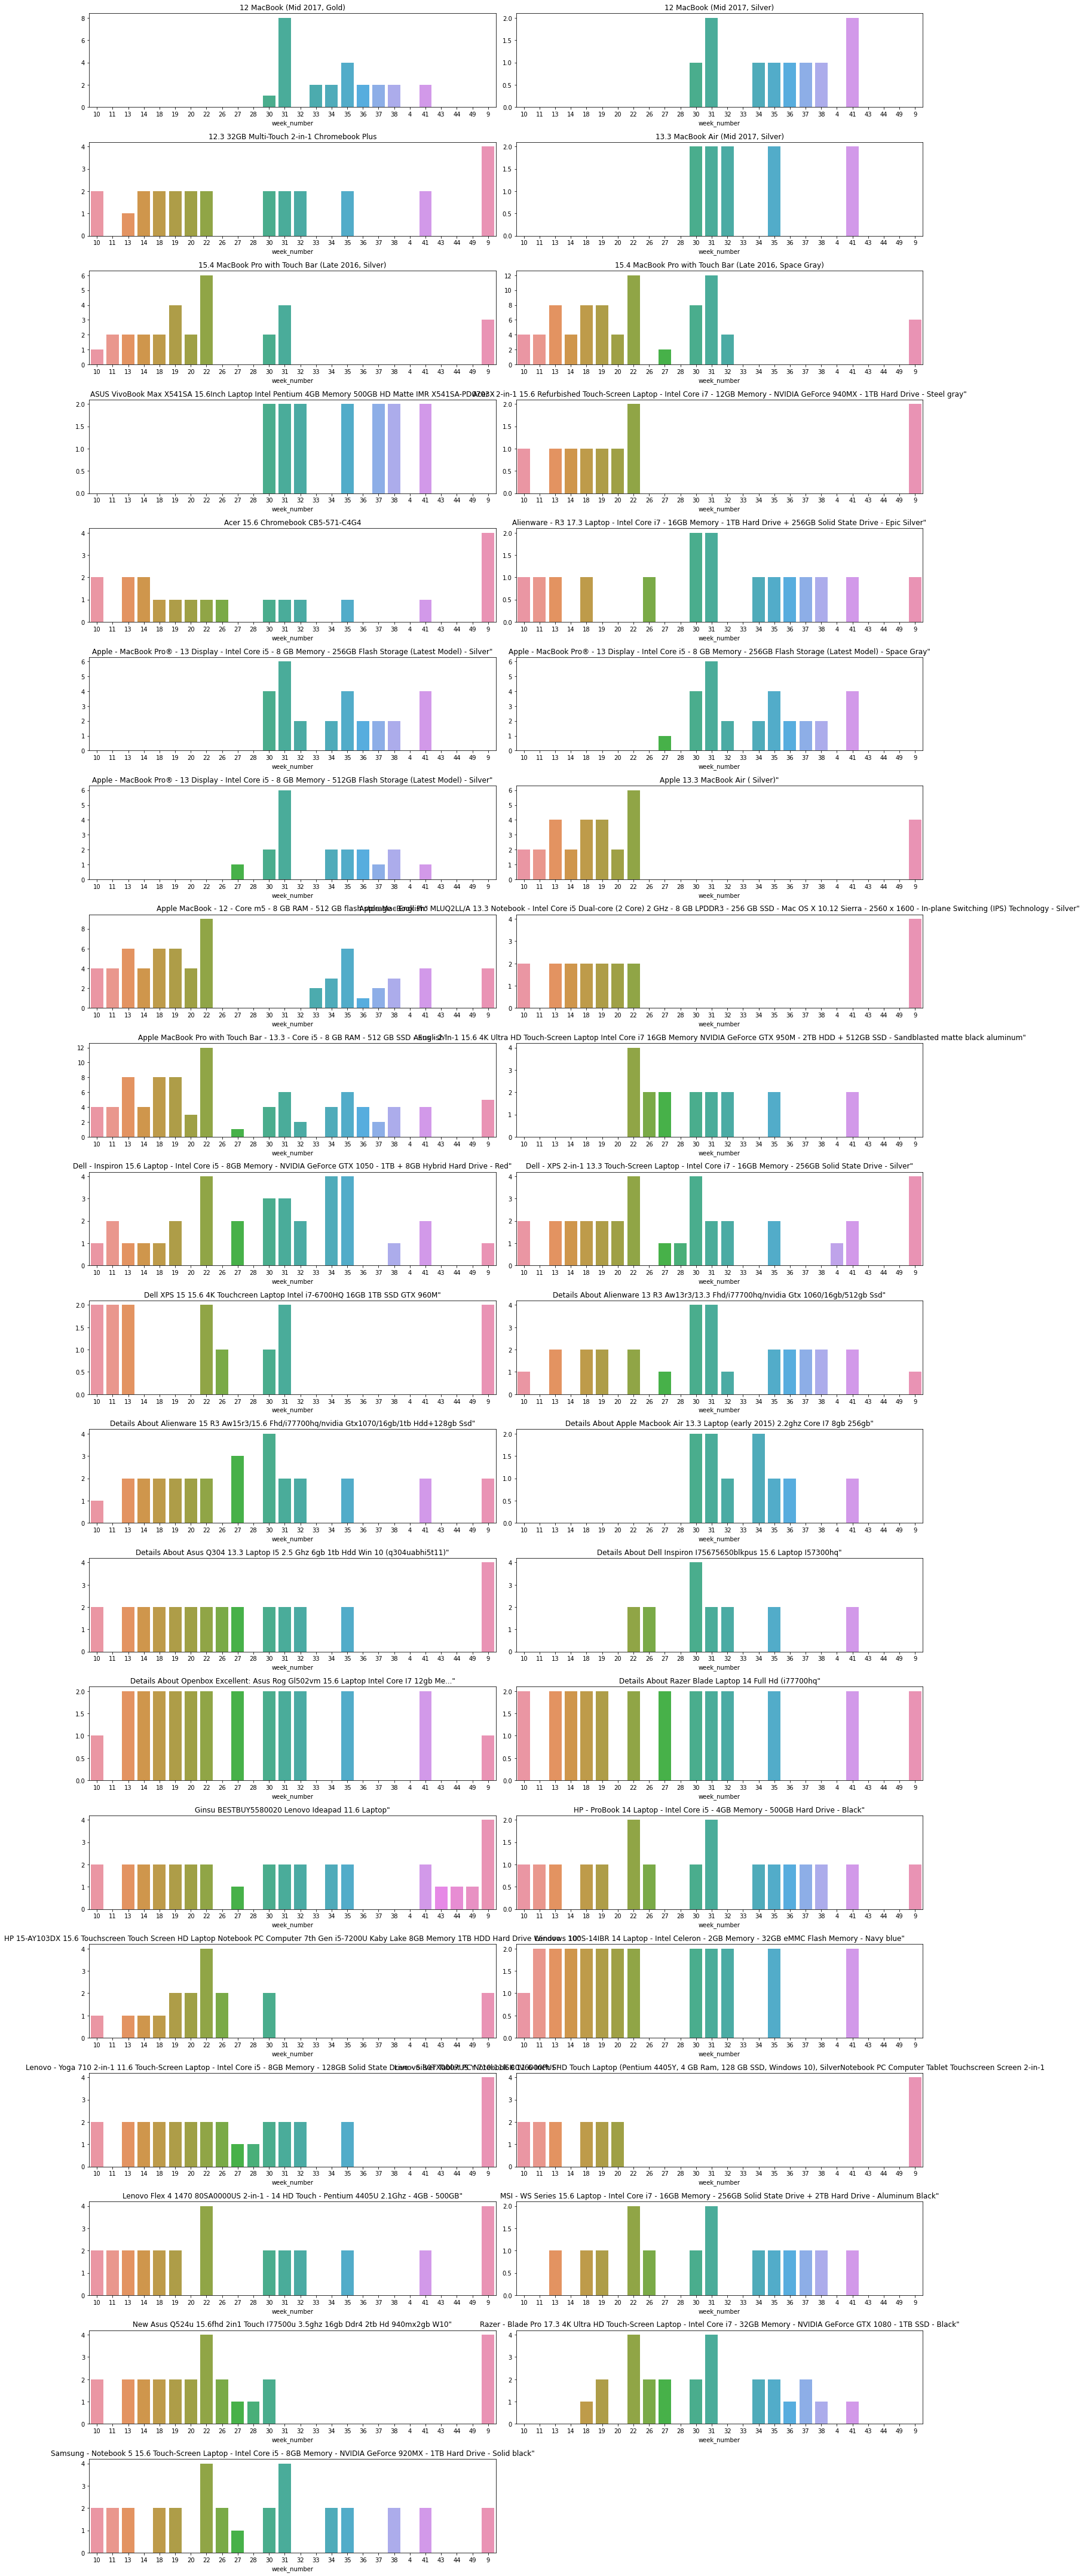

In [21]:
df_aux2 = pd.DataFrame(df_bestbuy_laptop_pivot_demand_2.to_records())
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(df_aux2.columns), 1):
    plt.subplot(20, 2, k)
    sns.barplot(x="week_number", y=df_aux2.columns[k], data=df_aux2)
    plt.title(df_aux2.columns[k])
    plt.ylabel("")
    plt.tight_layout()

# Machine Learning Modelling

In [13]:
#Select the products which slope of linear regression are statistically significant (p-value less than 0.05)

elasticity_results_laptop = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "demand_mean": [],
    "intercept": [],
    "slope": [],
    "rsquared": [],
    "p_value": [],
}

for column in df_bestbuy_laptop_pivot_price_2.columns:
    column_points = []
    for i in range(len(df_bestbuy_laptop_pivot_price_2[column])):
        column_points.append(
            (
                df_bestbuy_laptop_pivot_price_2[column][i],
                df_bestbuy_laptop_pivot_demand_2[column][i],
            )
        )

    df = pd.DataFrame(list(column_points), columns=["x_price", "y_demand"])
    x_price = df["x_price"]
    y_demand = df["y_demand"]
    X_1s = sm.add_constant(x_price)
    macbook_model = sm.OLS(y_demand, X_1s)
    results = macbook_model.fit()

    if results.f_pvalue < 0.05:
        intercept, slope = results.params
        price_elasticity = round(slope * (np.mean(x_price) / np.mean(y_demand)),2)
        x_price_mean = round(np.mean(x_price),2)
        y_demand_mean = round(np.mean(y_demand),2)

        elasticity_results_laptop["name"].append(column)
        elasticity_results_laptop["price_elasticity"].append(price_elasticity)
        elasticity_results_laptop["price_mean"].append(x_price_mean)
        elasticity_results_laptop["demand_mean"].append(y_demand_mean)
        elasticity_results_laptop["intercept"].append(results.params[0])
        elasticity_results_laptop["slope"].append(results.params[1])
        elasticity_results_laptop["rsquared"].append(results.rsquared)
        elasticity_results_laptop["p_value"].append(results.f_pvalue)

        print(column, "\n")
        print(results.summary(), "\n")

df_elasticity = pd.DataFrame.from_dict(elasticity_results_laptop)
df_elasticity['ranking'] = df_elasticity.loc[:, 'price_elasticity'].rank(ascending=True).astype(int)

12 MacBook (Mid 2017, Silver) 

                            OLS Regression Results                            
Dep. Variable:               y_demand   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     5.852
Date:                Tue, 30 Apr 2024   Prob (F-statistic):             0.0235
Time:                        12:46:19   Log-Likelihood:                -21.833
No. Observations:                  26   AIC:                             47.67
Df Residuals:                      24   BIC:                             50.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.429

/tmp/ipykernel_203791/3030789030.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_bestbuy_laptop_pivot_price_2[column][i],
/tmp/ipykernel_203791/3030789030.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_bestbuy_laptop_pivot_demand_2[column][i],
/tmp/ipykernel_203791/3030789030.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_bestbuy_laptop_pivot_price_2[column][i],
/tmp/ipykernel_203791/3030789030.py:20: Futur

# Business Performance

In [18]:
result_revenue = {
    "name": [],
    "current revenue": [],
    "reduced revenue (price red. 10%)": [],
    "loss revenue (price red. 10%)": [],
    "new revenue": [],
    "variation revenue": [],
    "perc. variation revenue": [],
}

for i in range(0, len(df_elasticity)):
    name = df_elasticity["name"][i]
    current_avg_price = df_elasticity["price_mean"][i]
    current_demand = df_bestbuy_laptop_pivot_demand_2[name].sum()

    reduced_price = current_avg_price * 0.9
    increased_demand = 1 + 0.1 * abs(df_elasticity["price_elasticity"][i])

    new_demand = increased_demand * current_demand

    current_revenue = current_avg_price * current_demand
    new_revenue = new_demand * reduced_price

    reduced_revenue = current_revenue * 0.9

    loss_revenue = f'${round((current_revenue - reduced_revenue),2)}'

    variation_revenue = new_revenue - current_revenue
    variation_revenue = f'${round(variation_revenue,2)}'

    perc_variation_revenue = f'{round(((new_revenue - current_revenue) / current_revenue) * 100,2)}%'
    reduced_revenue = f'${round(reduced_revenue,2)}'
    current_revenue = f'${round(current_revenue,2)}'
    new_revenue = f'${round(new_revenue,2)}'

    result_revenue["name"].append(name)
    result_revenue["current revenue"].append(current_revenue)
    result_revenue["reduced revenue (price red. 10%)"].append(reduced_revenue)
    result_revenue["loss revenue (price red. 10%)"].append(loss_revenue)
    result_revenue["new revenue"].append(new_revenue)
    result_revenue["variation revenue"].append(variation_revenue)
    result_revenue["perc. variation revenue"].append(perc_variation_revenue)

df_elasticity['price_mean'] = df_elasticity['price_mean'].apply(
    lambda x: f'${str(round(x, 2))}'
)
df_elasticity.to_parquet("../data/df_elasticity.parquet")
pd.DataFrame(result_revenue).to_parquet("../data/result_elasticity.parquet")

In [19]:
dfi.export(pd.DataFrame(result_revenue), 'business_result.png')

In [17]:
dfi.export(df_elasticity, 'df_elasticity.png')